## Bike-Sharing Provider Case Study

#### Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.

So company wants to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market.

Essentially, the company wants —

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands
- To know the accuracy of the model, i.e. how well these variables can predict demand for shared bikes.

**So interpretation is important!**

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the bike sharing dataset

In [139]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [140]:
import numpy as np
import pandas as pd

In [141]:
bikeshare = pd.read_csv("day.csv")

In [142]:
# Check the head of the dataset
bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the housing dataframe

In [143]:
bikeshare.shape

(730, 16)

In [144]:
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [145]:
bikeshare.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Visualising the Data
If there is some obvious multicollinearity going on, this is the first place to catch it. <br/>
Here's where you'll also identify if some predictors directly have a strong association with the outcome variable. <br/>
We'll visualise our data using matplotlib and seaborn.

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

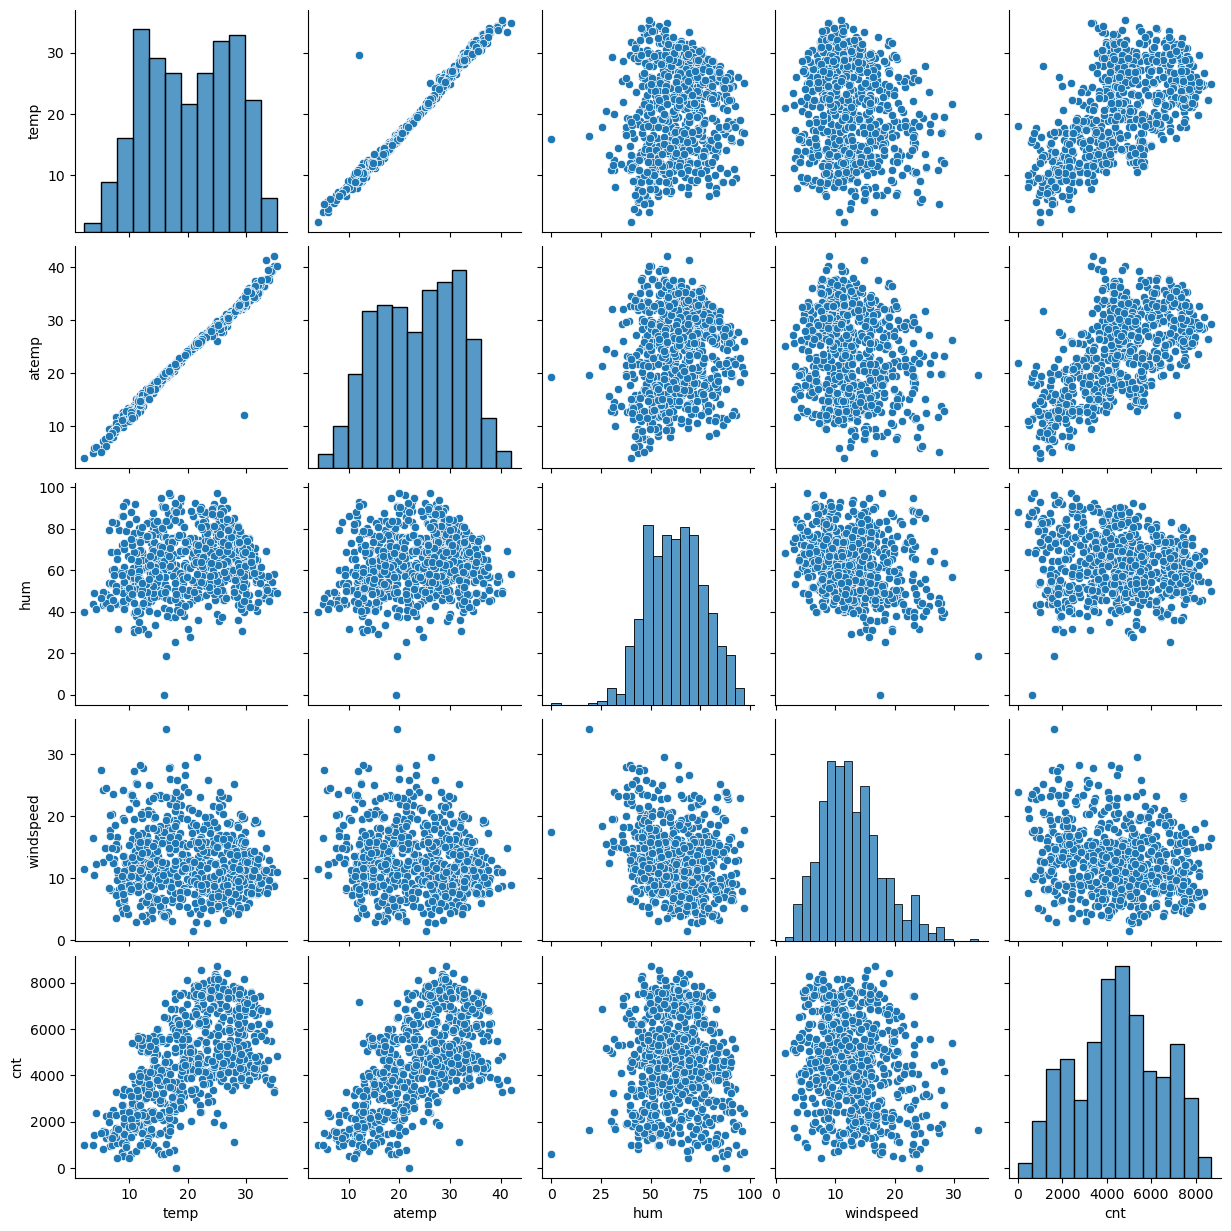

In [147]:
#Visualising Numeric Variables
sns.pairplot(bikeshare[['temp','atemp','hum','windspeed','cnt']])
plt.show()

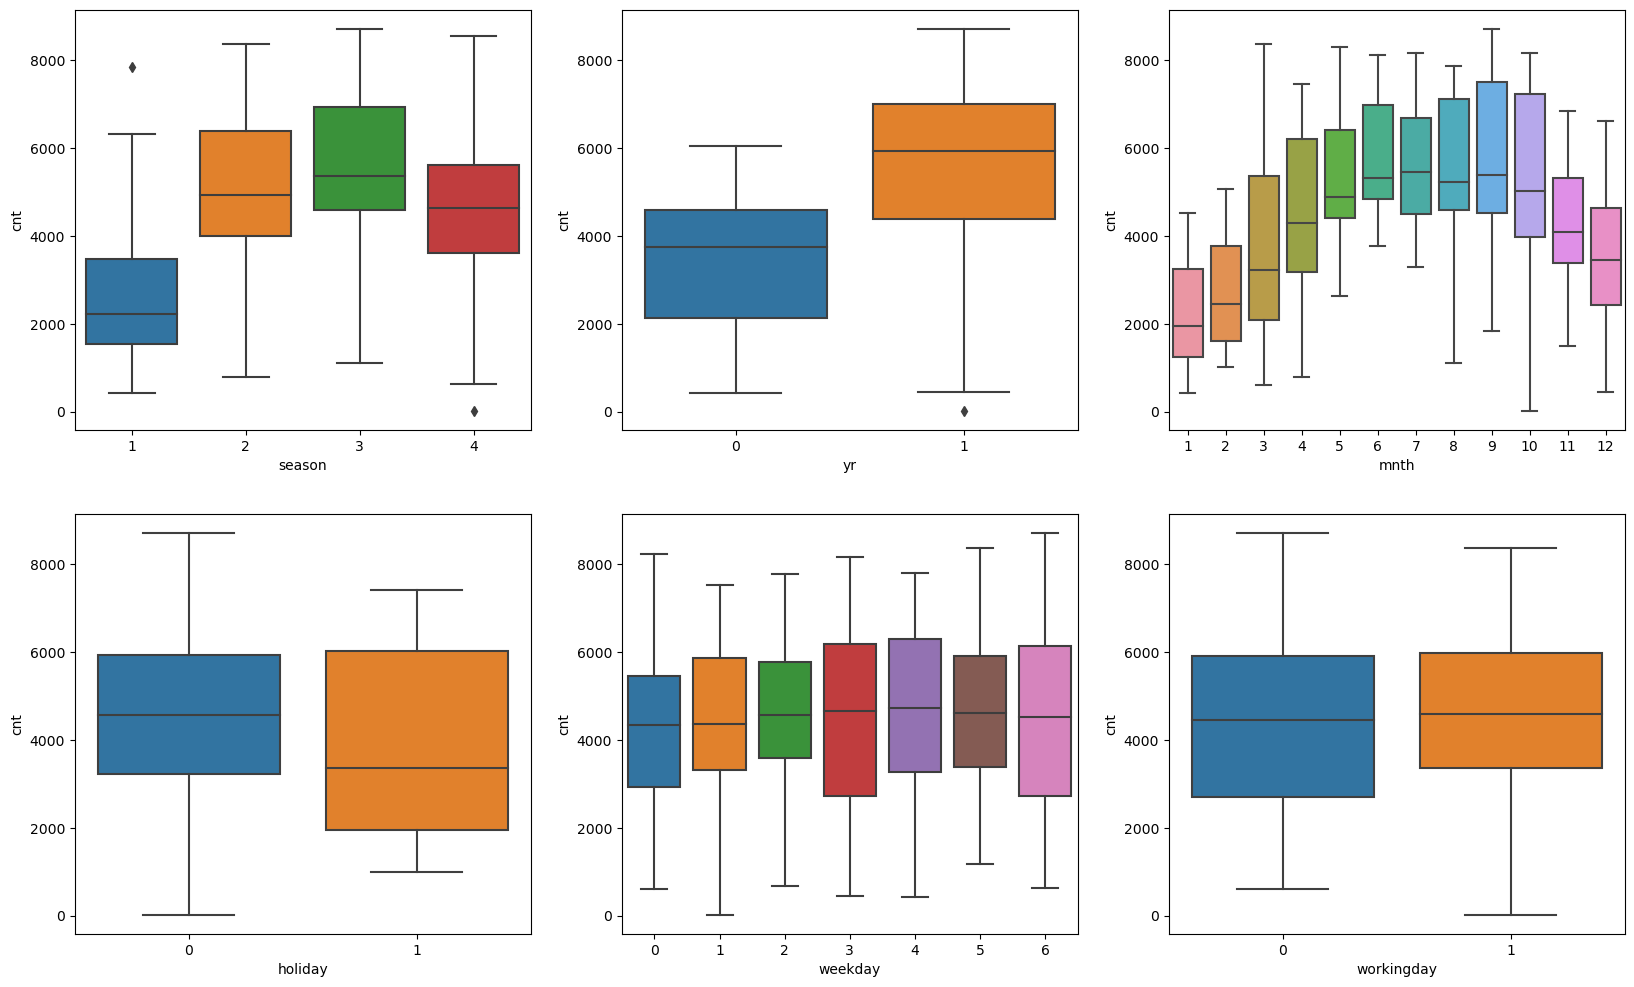

In [148]:
#Visualising Categorical Variables
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1) 
sns.boxplot(x = 'season', y = 'cnt', data = bikeshare)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikeshare)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikeshare)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikeshare)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikeshare)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikeshare)
plt.show()

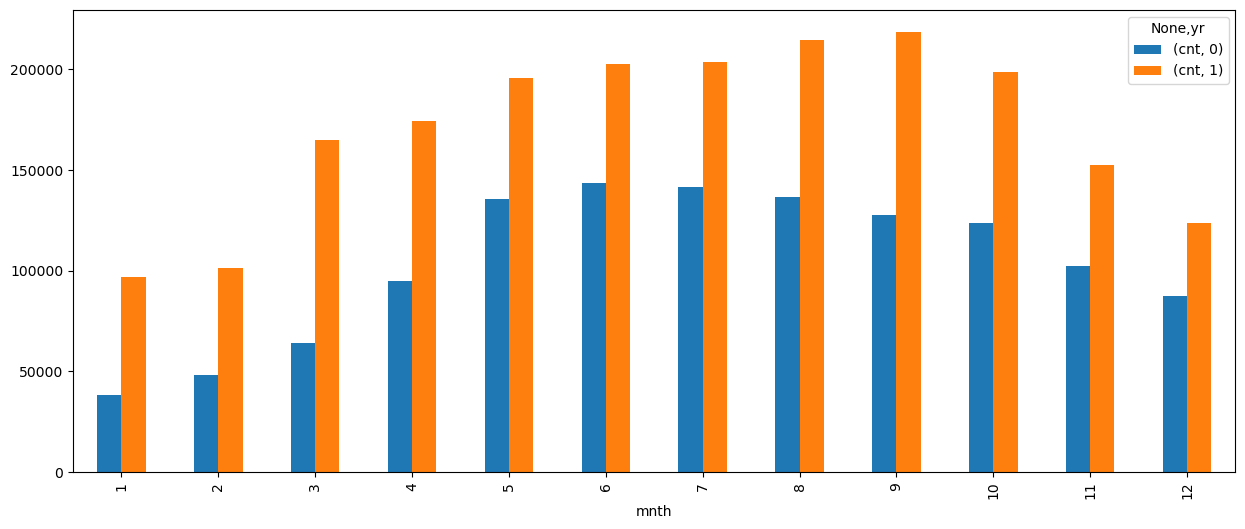

In [149]:
bike_share = pd.pivot_table(data=bikeshare,  index=["mnth"], values=['cnt'], columns = ["yr"], aggfunc=sum)
bike_share.plot(kind="bar",  figsize=[15,6])
plt.show()

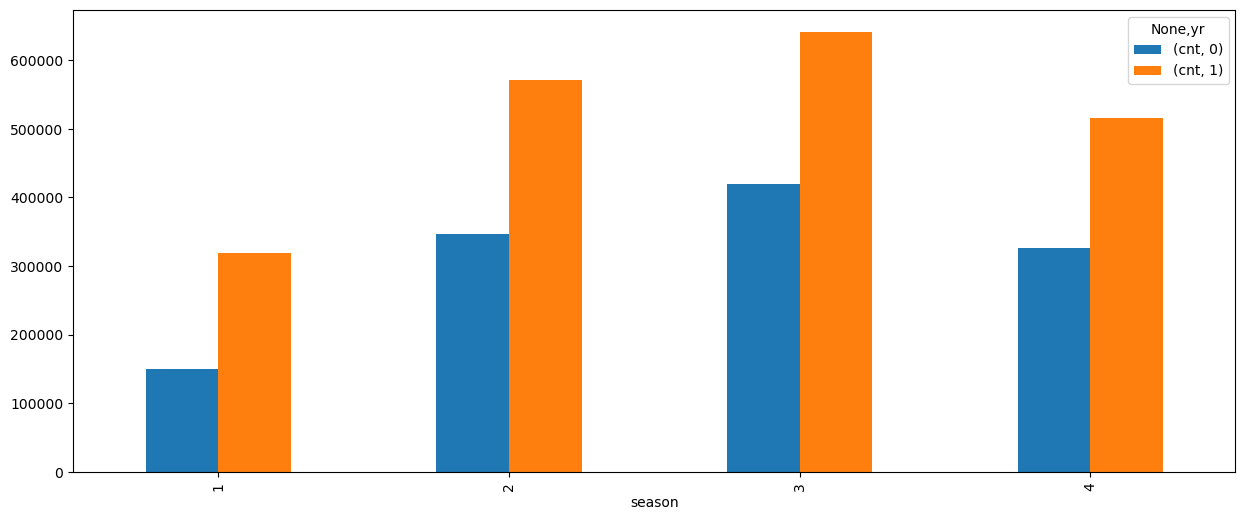

In [150]:
bike_share = pd.pivot_table(data=bikeshare,  index=["season"], values=['cnt'], columns = ["yr"], aggfunc=sum)
bike_share.plot(kind="bar",  figsize=[15,6])
plt.show()

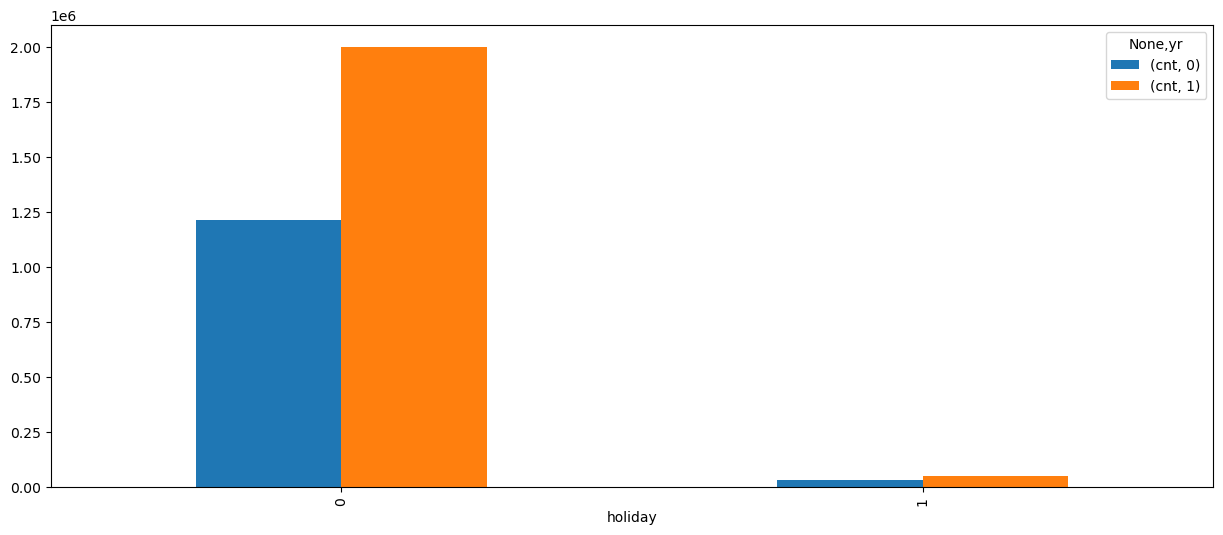

In [151]:
bike_share = pd.pivot_table(data=bikeshare,  index=["holiday"], values=['cnt'], columns = ["yr"], aggfunc=sum)
bike_share.plot(kind="bar",  figsize=[15,6])
plt.show()

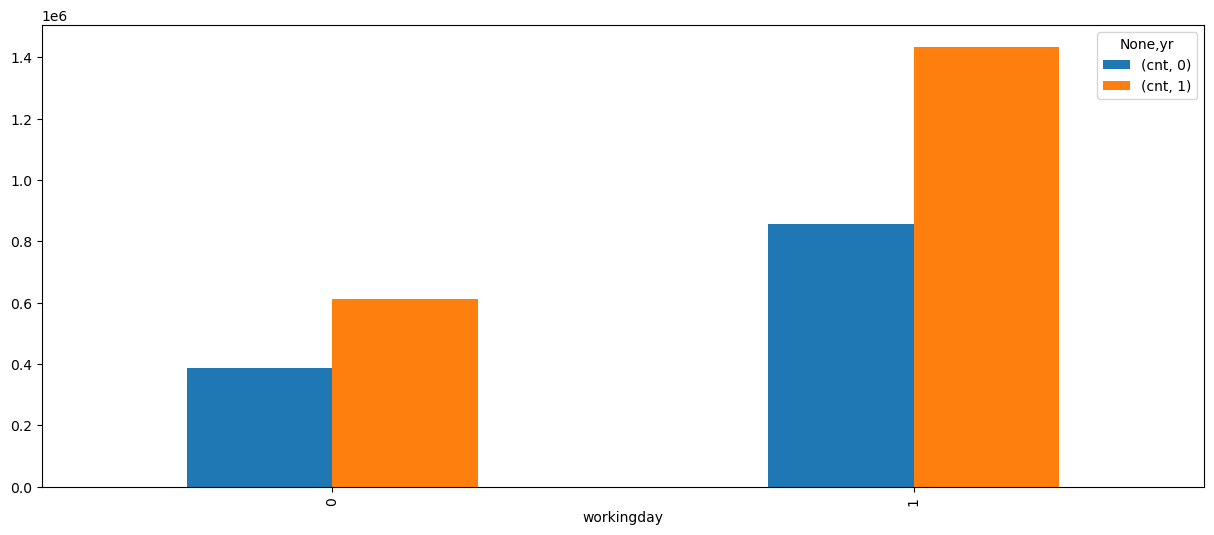

In [152]:
bike_share = pd.pivot_table(data=bikeshare,  index=["workingday"], values=['cnt'], columns = ["yr"], aggfunc=sum)
bike_share.plot(kind="bar",  figsize=[15,6])
plt.show()

## Step 3: Preparing The Data
Lets remove unique(relatively insignificant), redundent columns 

In [153]:
#First creating filter so it will check column exist or not, while droping column not exists error will not come
#removing instant unique column
#removing dteday as we already have yr and month column present in dataset
#removing casual and registered as target variable cnt already has the values of both the variables 
bikeshare_remove = ['instant','dteday','casual','registered']
dropFilter = bikeshare.filter(bikeshare_remove)
bikeshare.drop(dropFilter, axis=1, inplace=True)
bikeshare.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [154]:
# As numeric values of season has no specific order significance we are converting it back to its original categorical values.
maplist = ['season']
season_dict = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
bikeshare[maplist] = bikeshare[maplist].apply(lambda x: x.map(season_dict))
#bikeshare[maplist] = bikeshare[maplist].apply(lambda x: x.map(season_dict) if x.to_string() in season_dict.keys() else x)

In [155]:
# As numeric values of weathersit has no specific order significance we are converting it back to its original categorical values.
maplist = ['weathersit']
weather_dict = {1:'Clear', 2:'Mist_Cloudy', 3:'Light_Snow', 4:'Heavy_Rain'}
bikeshare[maplist] = bikeshare[maplist].apply(lambda x: x.map(weather_dict))

In [156]:
# we are converting weekday back to its original categorical values.
maplist = ['weekday']
weekdays_dic = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
bikeshare[maplist] = bikeshare[maplist].apply(lambda x: x.map(weekdays_dic))

In [157]:
# we are converting mnth back to its original categorical values.
maplist = ['mnth']
month_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'April', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
bikeshare[maplist] = bikeshare[maplist].apply(lambda x: x.map(month_dict))

In [158]:
bikeshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sun,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Mon,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Tue,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Wed,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Thu,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Step 4: Missing value check
There are no missing values found

In [159]:
(bikeshare.isnull().sum()/len(bikeshare.index))*100

season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64

## Step 5: Dummy variables

In [160]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season_dumm'
#drop_first will delete the `fall` column. we should create n-1 dummy columns.
season_dumm = pd.get_dummies(bikeshare['season'], drop_first = True)
season_dumm.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [161]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weathersit_dumm'
#drop_first will delete the `Clear` column. we should create n-1 dummy columns.
weathersit_dumm = pd.get_dummies(bikeshare['weathersit'], drop_first = True)
weathersit_dumm.head()

,Light_Snow,Mist_Cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [162]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'month_dumm'
#drop_first will delete the `Apr` column. we should create n-1 dummy columns.
month_dumm = pd.get_dummies(bikeshare['mnth'], drop_first = True)
month_dumm.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [163]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'weekday_dumm'
#drop_first will delete the `Fri` column. we should create n-1 dummy columns.
weekday_dumm = pd.get_dummies(bikeshare['weekday'], drop_first = True)
weekday_dumm.head()

,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,1,0,0,0
1,1,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0


In [164]:
# Add the results to the original bikeshare dataframe
bikeshare = pd.concat([bikeshare, season_dumm, weathersit_dumm, month_dumm, weekday_dumm], axis = 1)
bikeshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,0,Jan,0,Sun,0,Mist_Cloudy,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,1,0,0,0
1,spring,0,Jan,0,Mon,0,Mist_Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,0
2,spring,0,Jan,0,Tue,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,1,0
3,spring,0,Jan,0,Wed,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,0,1
4,spring,0,Jan,0,Thu,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [165]:
bikeshare.drop(['season','weathersit','mnth','weekday'], axis = 1, inplace = True)
bikeshare.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [166]:
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   yr           730 non-null    int64  
 1   holiday      730 non-null    int64  
 2   workingday   730 non-null    int64  
 3   temp         730 non-null    float64
 4   atemp        730 non-null    float64
 5   hum          730 non-null    float64
 6   windspeed    730 non-null    float64
 7   cnt          730 non-null    int64  
 8   spring       730 non-null    uint8  
 9   summer       730 non-null    uint8  
 10  winter       730 non-null    uint8  
 11  Light_Snow   730 non-null    uint8  
 12  Mist_Cloudy  730 non-null    uint8  
 13  Aug          730 non-null    uint8  
 14  Dec          730 non-null    uint8  
 15  Feb          730 non-null    uint8  
 16  Jan          730 non-null    uint8  
 17  Jul          730 non-null    uint8  
 18  Jun          730 non-null    uint8  
 19  Mar     

## Step 6: Splitting the Data into Training and Testing Sets

In [167]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bikeshare, train_size = 0.7, test_size = 0.3, random_state = 100)

In [168]:
bike_train.shape

(510, 30)

In [169]:
bike_test.shape

(219, 30)

## Step 7: Rescaling the Features. 
We will use MinMax scaling.

In [170]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [171]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [172]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,1,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,1,0,0,0


In [173]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.084314,0.086275,0.086275,0.080392,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.278131,0.281045,0.281045,0.272166,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


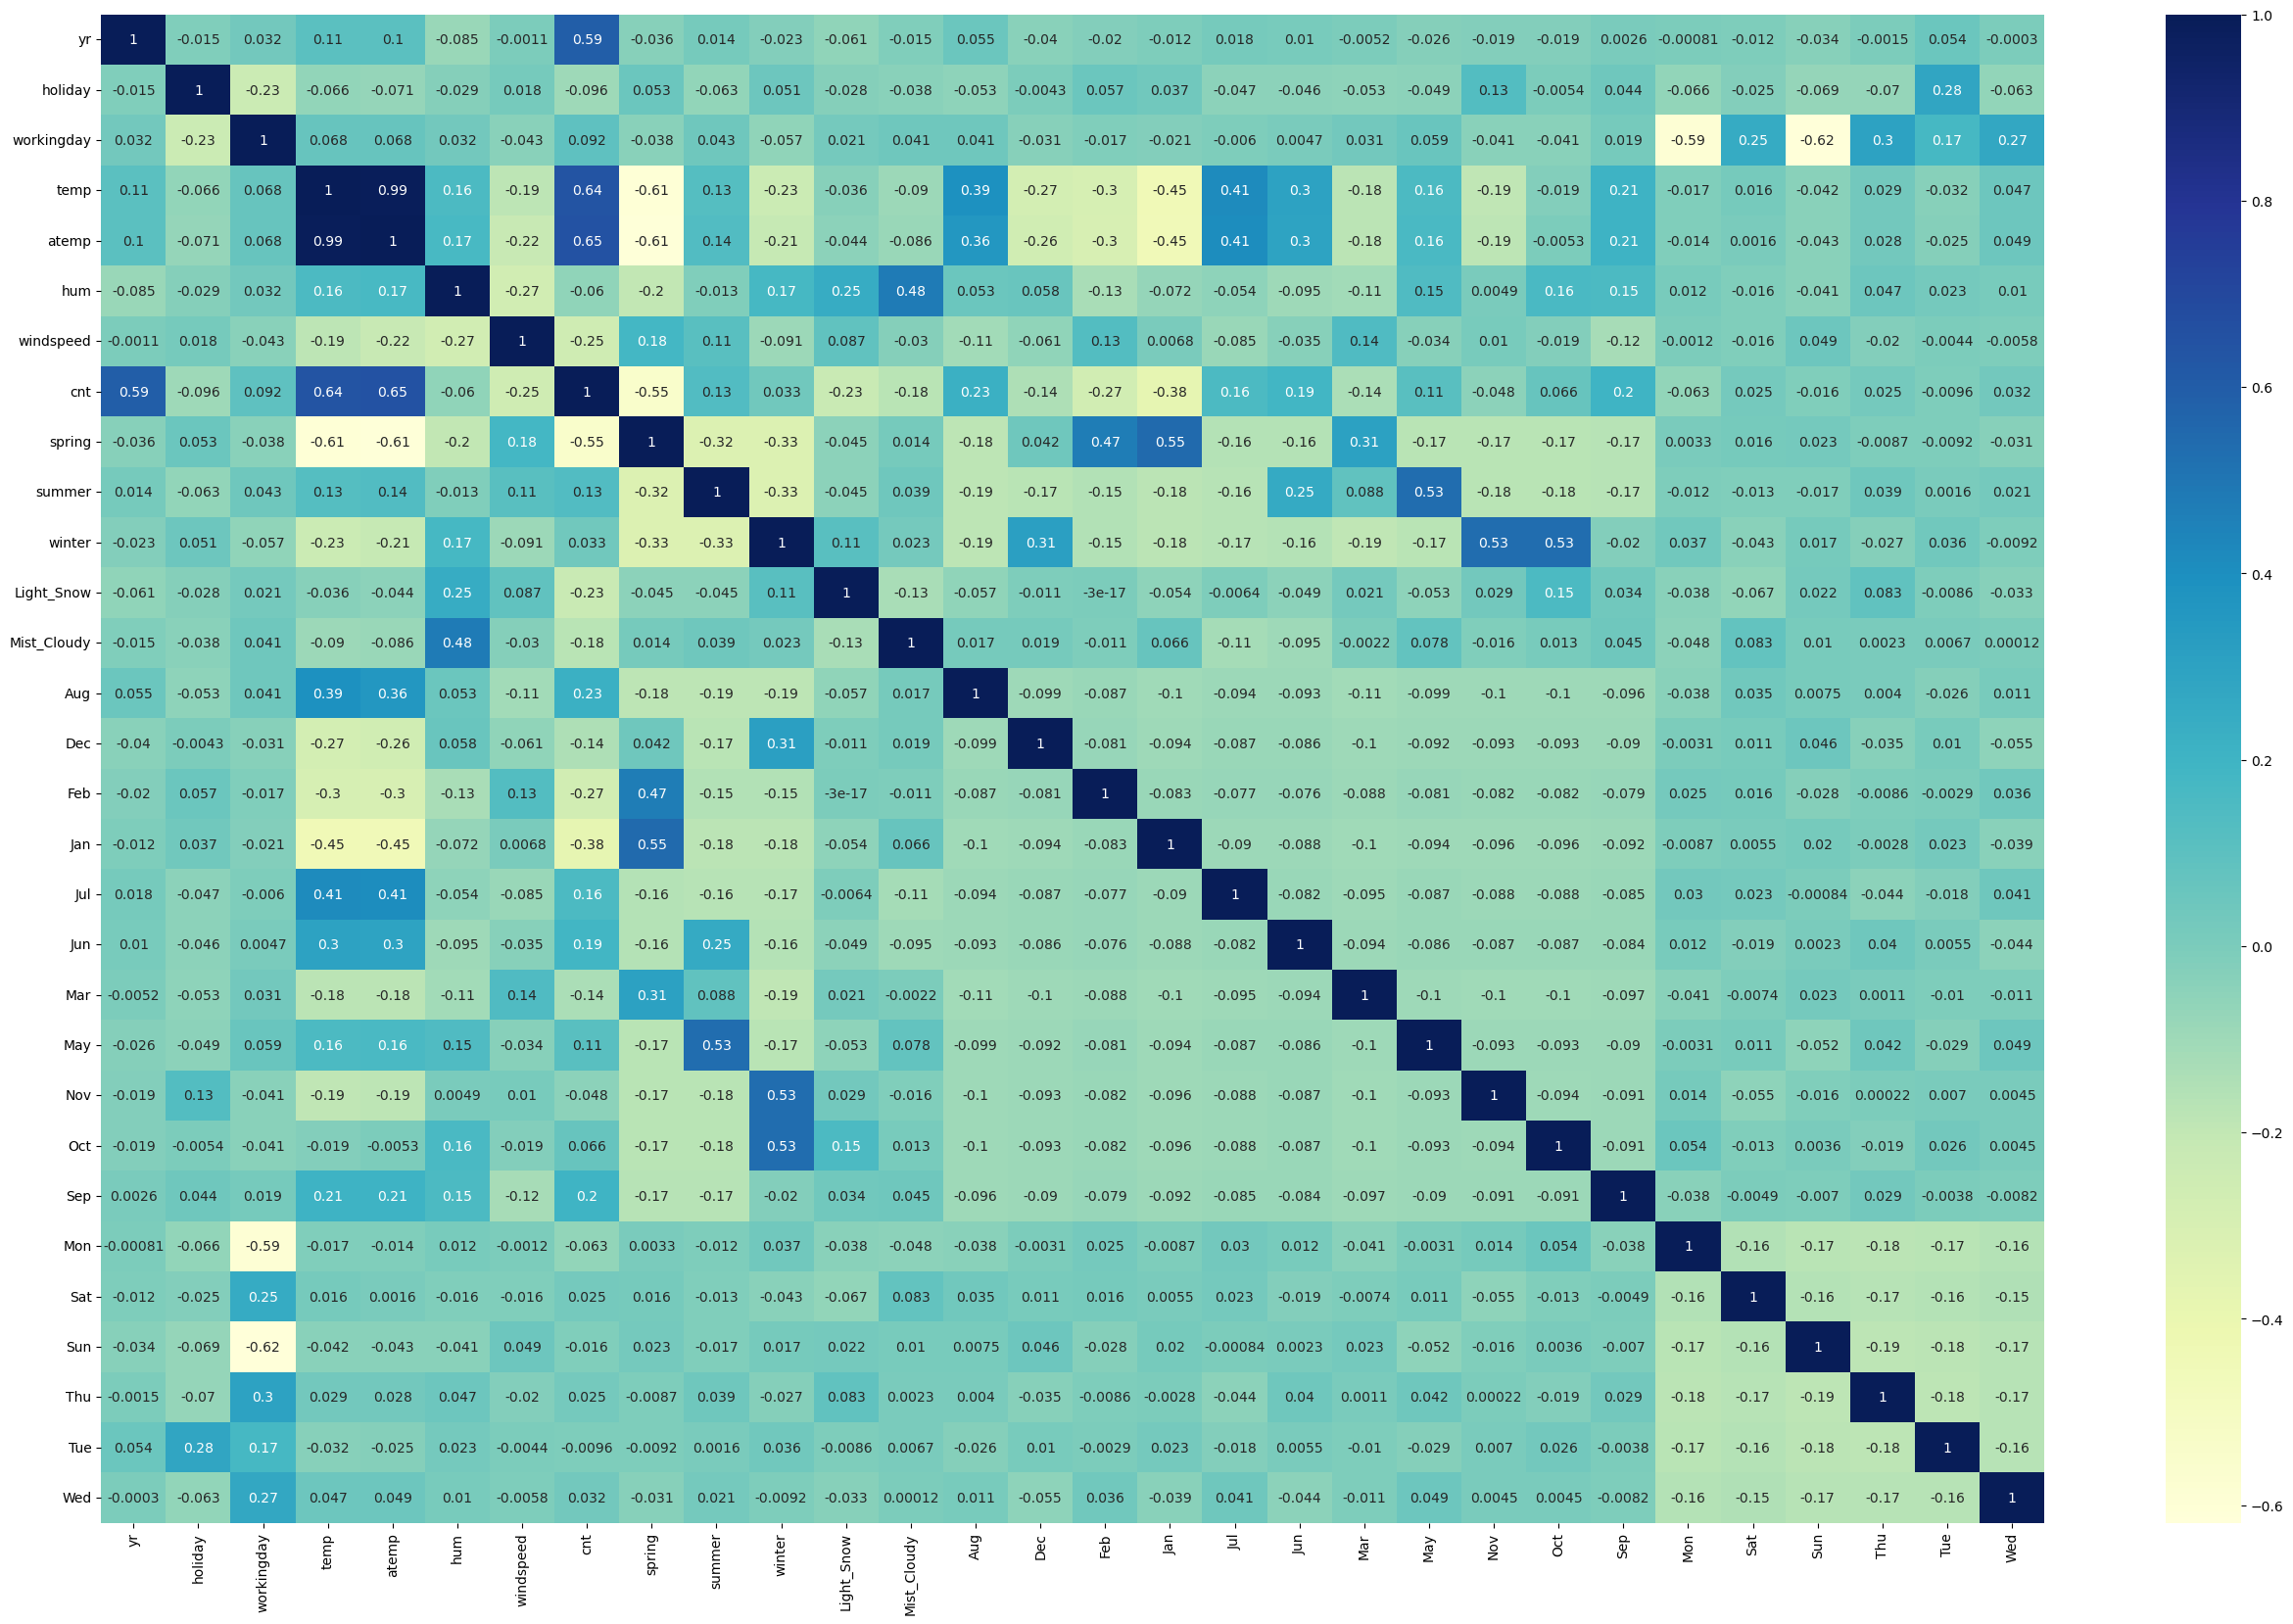

In [174]:
# Let's check the correlation coefficients to see which variables are highly correlated
#output varaible is highly corellated with yr, temp and atemp
#Also there is a correlation between month and season
plt.figure(figsize = (32, 20))
sns.heatmap(bike_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Step 8: Dividing into X and Y sets for the model building

In [175]:
y_bike_train = bike_train.pop('cnt')
X_bike_train = bike_train

## Step 9: Building our model

We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

In [176]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [177]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()

In [178]:
lm.fit(X_bike_train, y_bike_train)

LinearRegression()

In [179]:
rfe = RFE(lm, n_features_to_select=20)   # running RFE
rfe = rfe.fit(X_bike_train, y_bike_train)

In [180]:
list(zip(X_bike_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light_Snow', True, 1),
 ('Mist_Cloudy', True, 1),
 ('Aug', True, 1),
 ('Dec', False, 2),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 9),
 ('Mar', False, 10),
 ('May', True, 1),
 ('Nov', False, 8),
 ('Oct', True, 1),
 ('Sep', True, 1),
 ('Mon', False, 3),
 ('Sat', False, 6),
 ('Sun', True, 1),
 ('Thu', False, 7),
 ('Tue', False, 4),
 ('Wed', False, 5)]

In [181]:
col = X_bike_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Light_Snow', 'Mist_Cloudy', 'Aug', 'Feb',
       'Jan', 'Jul', 'May', 'Oct', 'Sep', 'Sun'],
      dtype='object')

In [182]:
X_bike_train.columns[~rfe.support_]

Index(['Dec', 'Jun', 'Mar', 'Nov', 'Mon', 'Sat', 'Thu', 'Tue', 'Wed'], dtype='object')

In [183]:
# Creating X_train dataframe with RFE selected variables
X_bike_train_rfe = X_bike_train[col]

In [184]:
# Adding a constant variable 
import statsmodels.api as sm  
X_bike_train_rfe = sm.add_constant(X_bike_train_rfe)

In [185]:
lm = sm.OLS(y_bike_train,X_bike_train_rfe).fit()   # Running the linear model

In [186]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     140.3
Date:                Fri, 16 Jun 2023   Prob (F-statistic):          6.73e-188
Time:                        13:23:49   Log-Likelihood:                 524.95
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     489   BIC:                            -919.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2661      0.039      6.798      

**`atemp` is insignificant in presence of other variables; can be dropped**

In [187]:
X_bike_train_new = X_bike_train_rfe.drop(["atemp"], axis = 1)

**Rebuilding the model without atemp**

In [188]:
# Adding a constant variable 
import statsmodels.api as sm  
X_bike_train_lm = sm.add_constant(X_bike_train_new)
lm = sm.OLS(y_bike_train,X_bike_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     147.9
Date:                Fri, 16 Jun 2023   Prob (F-statistic):          5.54e-189
Time:                        13:23:56   Log-Likelihood:                 524.94
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     490   BIC:                            -925.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2661      0.039      6.804      

**feb is insignificant in presence of other variables; can be dropped**

In [189]:
X_bike_train_new = X_bike_train_new.drop(["Feb"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_bike_train_lm = sm.add_constant(X_bike_train_new)
lm = sm.OLS(y_bike_train,X_bike_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.2
Date:                Fri, 16 Jun 2023   Prob (F-statistic):          6.71e-190
Time:                        13:23:59   Log-Likelihood:                 524.49
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     491   BIC:                            -930.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2619      0.039      6.743      

**Aug is insignificant in presence of other variables; can be dropped**

In [190]:
X_bike_train_new = X_bike_train_new.drop(["Aug"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_bike_train_lm = sm.add_constant(X_bike_train_new)
lm = sm.OLS(y_bike_train,X_bike_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.1
Date:                Fri, 16 Jun 2023   Prob (F-statistic):          1.02e-190
Time:                        13:24:18   Log-Likelihood:                 523.77
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     492   BIC:                            -935.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2753      0.037      7.412      

**May is insignificant in presence of other variables; can be dropped**

In [191]:
X_bike_train_new = X_bike_train_new.drop(["May"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_bike_train_lm = sm.add_constant(X_bike_train_new)
lm = sm.OLS(y_bike_train,X_bike_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     175.1
Date:                Fri, 16 Jun 2023   Prob (F-statistic):          1.80e-191
Time:                        13:24:29   Log-Likelihood:                 522.87
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     493   BIC:                            -939.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2659      0.036      7.290      

In [192]:
X_bike_train_new.shape

(510, 17)

In [193]:
X_bike_train_new.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Light_Snow', 'Mist_Cloudy', 'Jan', 'Jul',
       'Oct', 'Sep', 'Sun'],
      dtype='object')

In [194]:
X_bike_train_new = X_bike_train_new.drop(['const'], axis=1)

**All p-values are less than 0.5, therefore all 17 variables seems to be highly correlated with output variable**<br/>
**Now checking the VIF values for multicollinearity**

In [195]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [196]:
vif = pd.DataFrame()
X = X_bike_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.59
3,temp,18.31
2,workingday,5.36
5,windspeed,4.73
6,spring,4.54
8,winter,4.14
7,summer,2.84
10,Mist_Cloudy,2.29
0,yr,2.09
15,Sun,1.99


**Independdant variable hum is highly correlated with other predictor variables with VIF value 29.59, need to be removed**

In [197]:
X_bike_train_new = X_bike_train_new.drop(['hum'], axis=1)

In [198]:
vif = pd.DataFrame()
X = X_bike_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.29
2,workingday,5.30
4,windspeed,4.67
5,spring,3.08
7,winter,2.50
6,summer,2.33
0,yr,2.08
14,Sun,1.98
10,Jan,1.62
12,Oct,1.62


In [199]:
# Adding a constant variable 
import statsmodels.api as sm  
X_bike_train_lm = sm.add_constant(X_bike_train_new)
lm = sm.OLS(y_bike_train,X_bike_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.5
Date:                Fri, 16 Jun 2023   Prob (F-statistic):          7.62e-189
Time:                        13:25:05   Log-Likelihood:                 513.87
No. Observations:                 510   AIC:                            -995.7
Df Residuals:                     494   BIC:                            -928.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1872      0.032      5.878      

In [200]:
lm.params

const          0.187220
yr             0.234981
holiday       -0.053504
workingday     0.047717
temp           0.453081
windspeed     -0.158866
spring        -0.066398
summer         0.041323
winter         0.060834
Light_Snow    -0.298819
Mist_Cloudy   -0.083377
Jan           -0.041835
Jul           -0.045088
Oct            0.040206
Sep            0.079466
Sun            0.059609
dtype: float64

In [201]:
X_bike_train_new.shape

(510, 15)

**Independdant variable temp is also correlated with other predictor variables with VIF value 7.29, but as a business point of view it is very important feature and also from scatter plot we can see it is most linearly related with output variable so i am keeping the variable temp in the model**

### From the parameters that we get, our linear regression equation becomes:

Bike Share Count = 0.187220 +0.234981×yr -0.053504*holiday +0.047717*workingday +0.453081*temp -0.158866*windspeed -0.066398*spring 
+0.041323*summer +0.060834*winter -0.298819*Light_Snow -0.083377*Mist_Cloudy -0.041835*Jan -0.045088*Jul +0.040206*Oct +0.079466*Sep +0.059609*Sun 

## Step 10: Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [202]:
y_bike_train_cnt = lm.predict(X_bike_train_lm)

In [203]:
residual = (y_bike_train - y_bike_train_cnt)
residual.head()

653    0.110050
576    0.075540
426   -0.026654
728   -0.157414
482   -0.106109
dtype: float64

Text(0.5, 0, 'Errors')

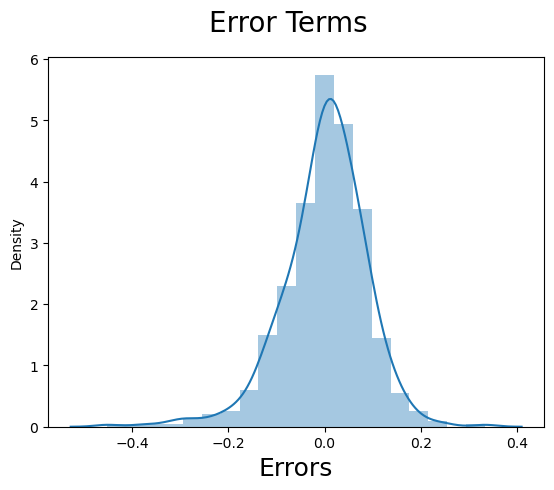

In [204]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_bike_train - y_bike_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

**Error terms are normally distributed with mean = 0, Assumption of linear regression is respected.**

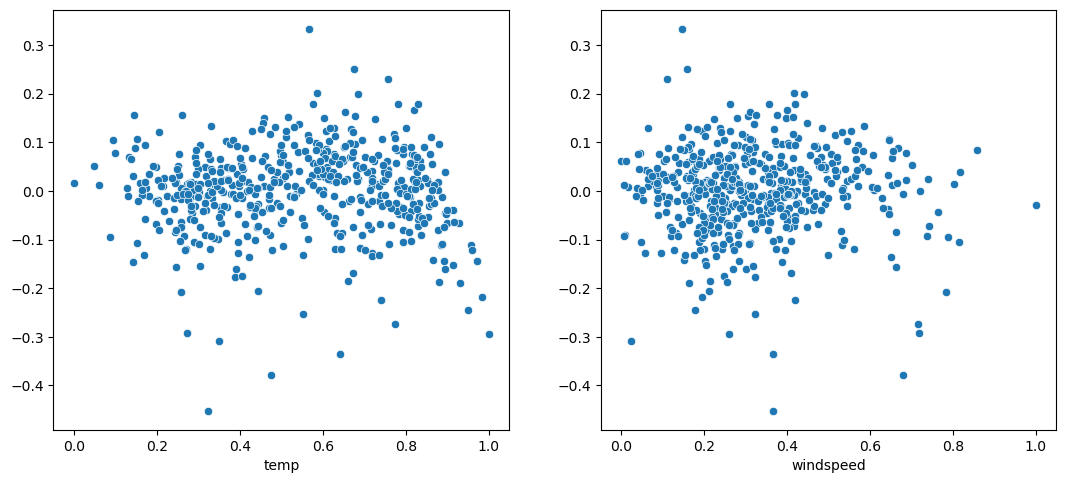

In [205]:
#Looking for patterns in the residuals
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1) 
sns.scatterplot(x = X_bike_train_new['temp'], y = residual)
plt.subplot(2,3,2)
sns.scatterplot(x = X_bike_train_new['windspeed'], y = residual)
plt.show()

**There is no pattern found in error terms, so another assumption of linear regression is respected.<br/>We can also see that error term variance is constant for both the features i.e between -0.3 to +0.3. so another assumption of linear regression is respected.<br/>We are confident that the model fit isn't by chance, and has decent predictive power.**

## Step 11: Making Predictions

**Applying the scaling on the test sets**

In [206]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])

**Dividing into X and Y sets for the model building**

In [207]:
y_bike_test = bike_test.pop('cnt')
X_bike_test = bike_test

In [208]:
# Creating X_bike_test_new dataframe by selecting variables from X_
X_bike_test_new = X_bike_test[X_bike_train_new.columns]

# Adding a constant variable 
X_bike_test_new = sm.add_constant(X_bike_test_new)

In [209]:
# Making predictions
y_bike_pred = lm.predict(X_bike_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

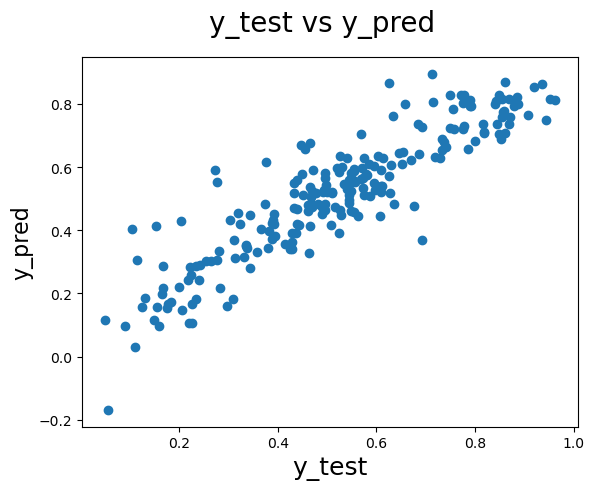

In [211]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_bike_test,y_bike_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [212]:
from sklearn.metrics import r2_score
r2_score(y_bike_test, y_bike_pred)

0.8112961909300445

## Above module is linearly significant model with 15 independant variables and `cnt` as target variable.
### The value of statistical measures are as below
R-squared:       84.5% <br/>
Adj. R-squared:  84.0% <br/>
F-statistic:     179.5 
